# OUMAZIZ Thiziri


# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div><img src="attachment:sinus2d.png" width=200></div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [63]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows to sample signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


<IPython.core.display.Javascript object>


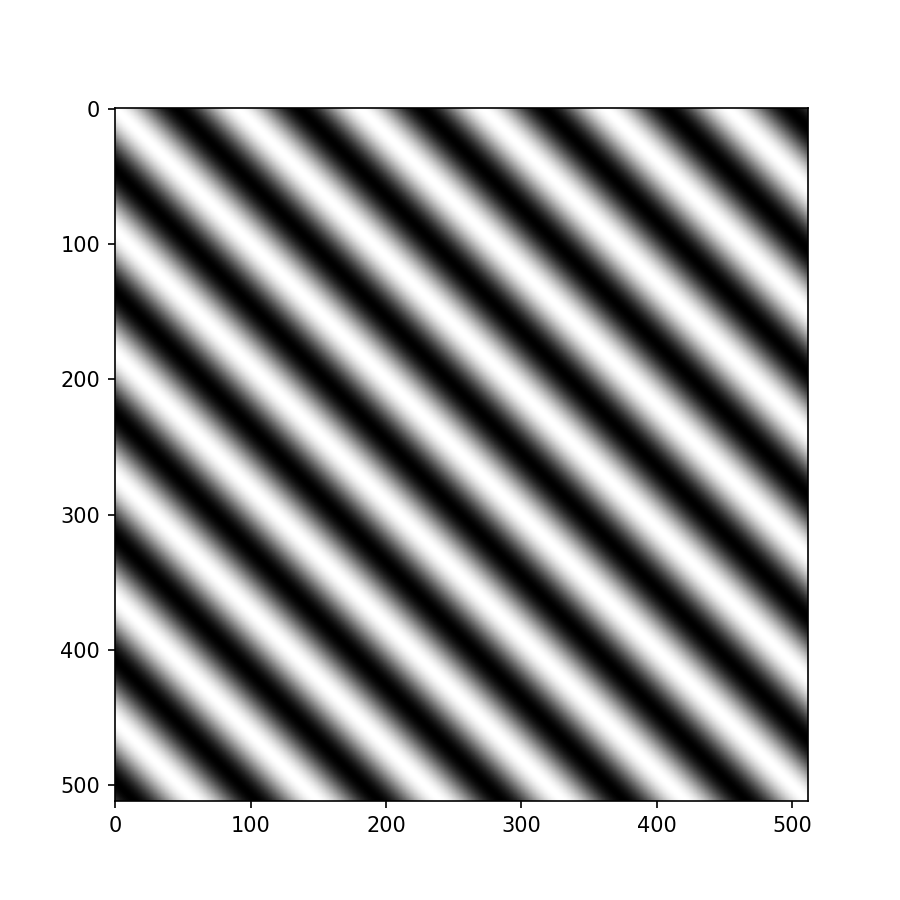

In [80]:
s45 = sinusoid2d(1, 45, 512, 64, 1)
#Affichage de l'image
imshow(s45)

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

* La fréquence maximale du signal $s_{45}$ dans la direction $t$ : $f_t^{\text{max}} = f_0\cos\theta = \frac1{T_0}\cos\theta = \frac1{64}\cos45 = 0.011 Hz$

* La fréquence maximale du signal $s_{45}$ dans la direction $u$ : $f_u^{\text{max}} = f_0\sin\theta = \frac1{T_0}\sin\theta = \frac1{64}\sin45 = 0.011 Hz$

* $f_m = \max(f_t^{\text{max}},f_u^{\text{max}}) = 0.011 Hz$

* Le théorème d'échantillonnage de Shannon stipule que pour reconstruire avec précision un signal continu à partir de ses échantillons, la fréquence d'échantillonnage $f_{s}$ doit être supérieure ou égale à deux fois la fréquence maximale présente dans le signal  $f_{m}$ ($f_{s}\geq 2f_{m}$). Ainsi, la fréquence limite d'échantillonnage est $f_{limite}=2f_{m}=0.022 Hz$


2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


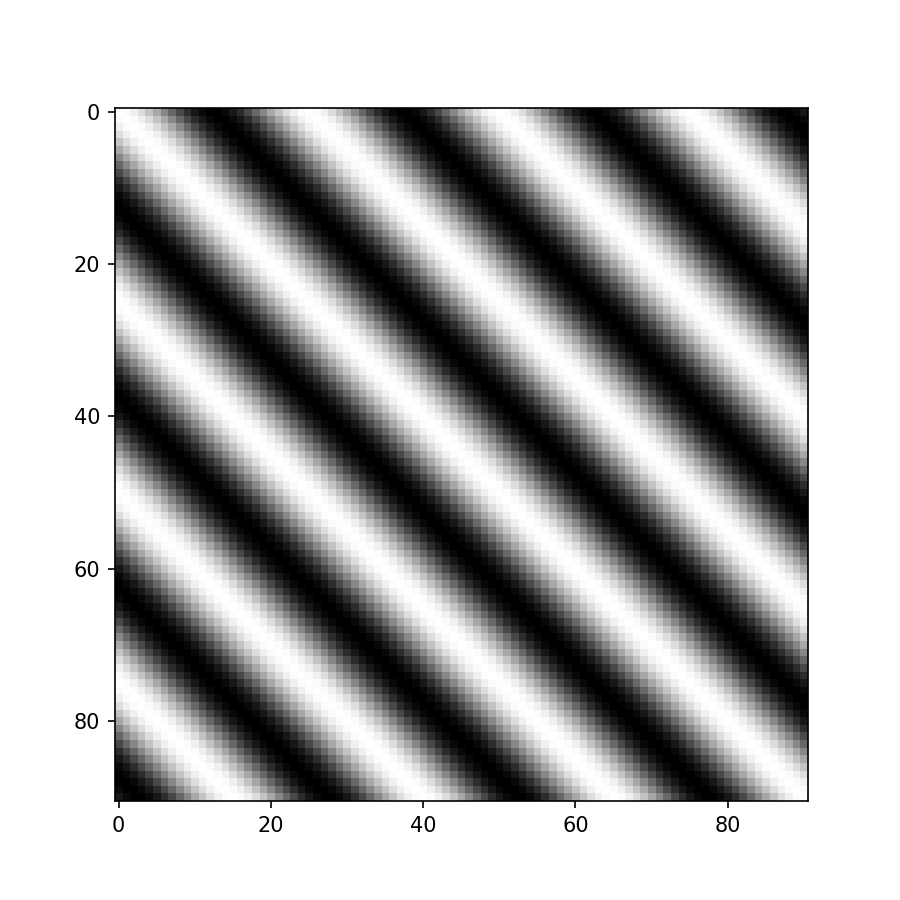

In [81]:
# Calcul de la fréquence max
fm = (1/64)*np.cos(45/180*np.pi)

# Calcul de la période d'échantillonnage
Ts_16 = 1/(16*fm)

# Image échantillonée
s45_16 = sinusoid2d(1, 45, 512, 100, Ts_16)
imshow(s45_16)

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

<IPython.core.display.Javascript object>


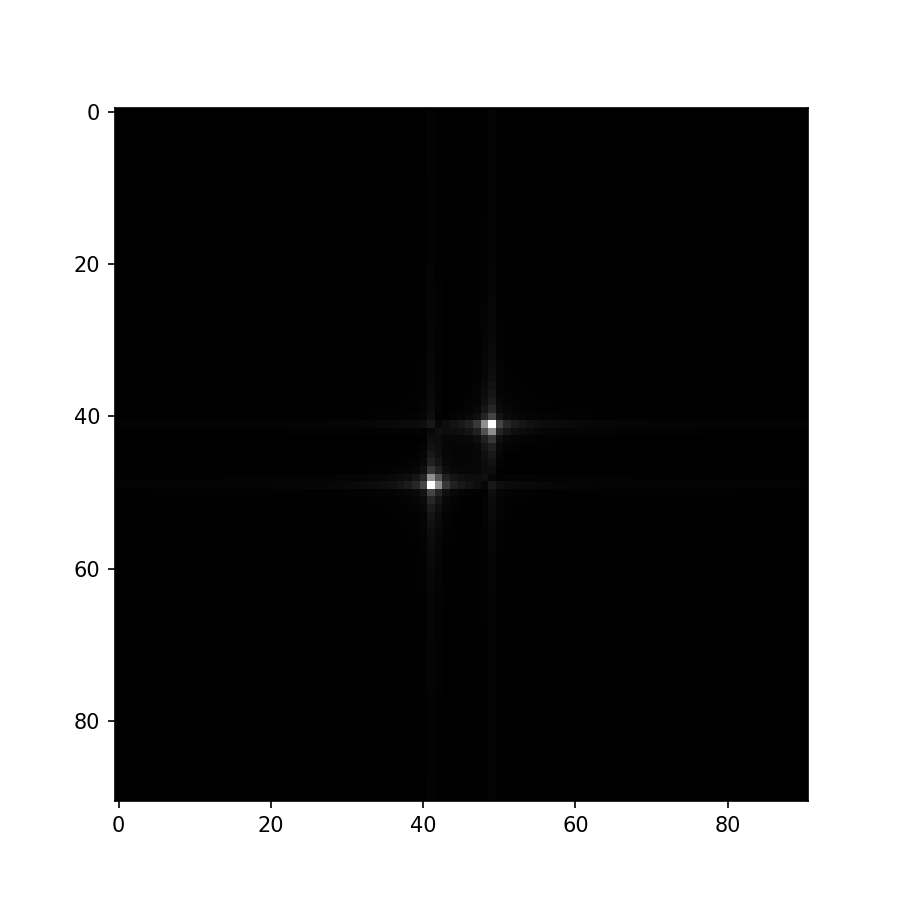

<IPython.core.display.Javascript object>


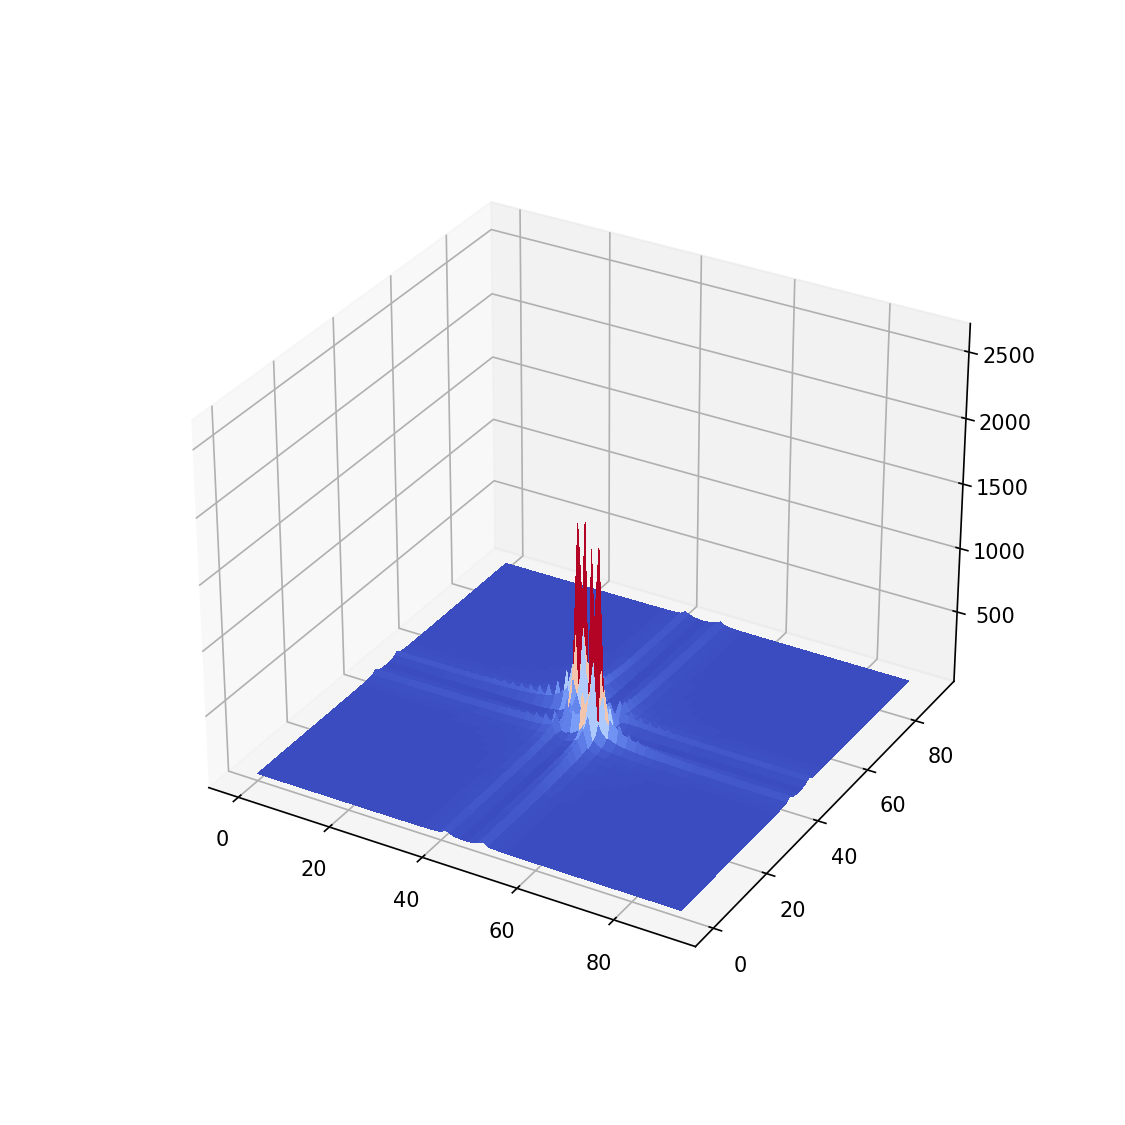

C:\Users\pc\AppData\Local\Temp\ipykernel_15108\1913139453.py:39: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [82]:
from numpy.fft import fft2,fftshift

# Calcul du module centré de la transformée de Fourier 2D
F_16 = fft2(s45_16)
module_16 =np.abs(F_16)
centered_module_16 = fftshift(module_16)

# Affichage du spectre 
imshow(centered_module_16)
surf(centered_module_16)

<IPython.core.display.Javascript object>


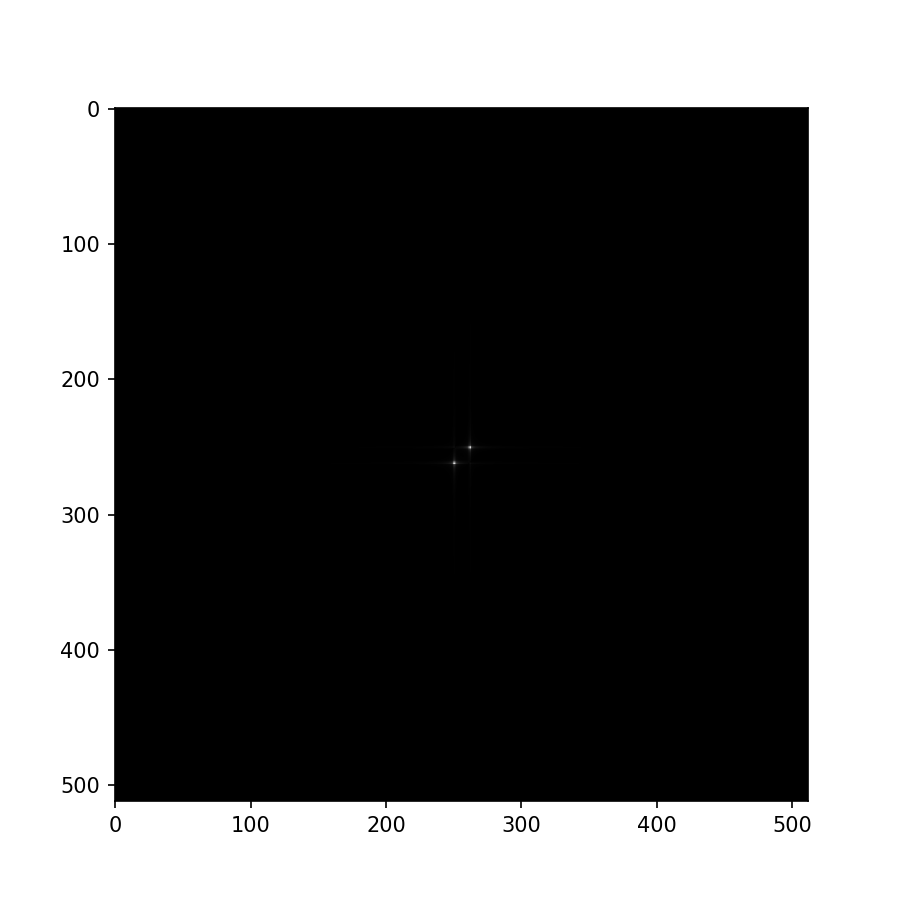

<IPython.core.display.Javascript object>


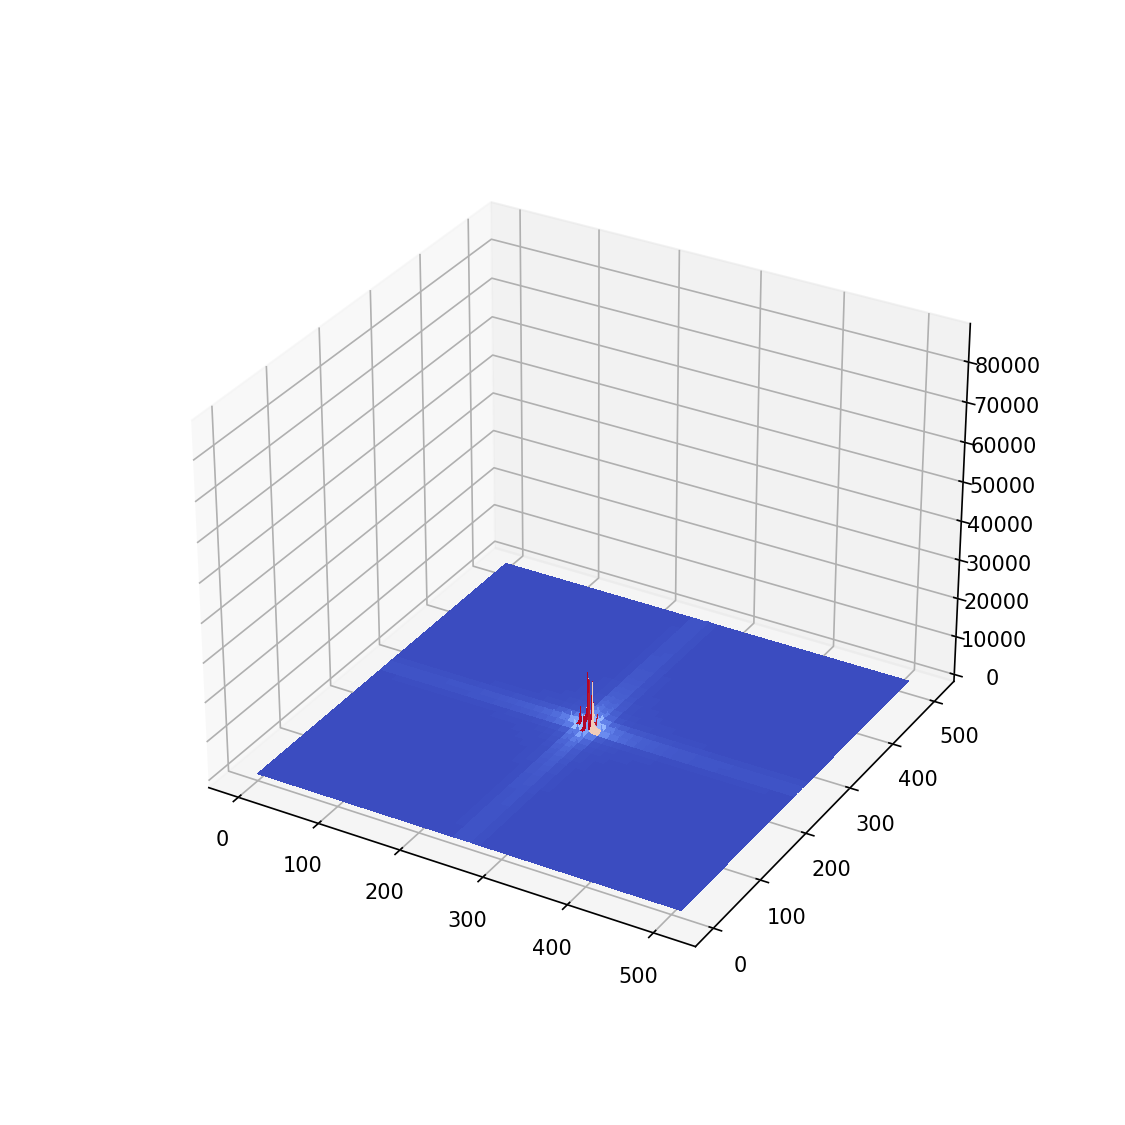

C:\Users\pc\AppData\Local\Temp\ipykernel_15108\1913139453.py:39: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [83]:
# Calcul du module centré de la transformée de Fourier de l'image originale
F = fft2(s45)
module =np.abs(F)
centered_module = fftshift(module)

# Affichage du spectre
imshow(centered_module)
surf(centered_module)

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

* Nous vérifions bien la présence de deux pics qui représentent les fréquences du signal 2D.
* L'échantillonnage avec $f_{s} = 16f_{m}$ signifie que le théorème de Shannon est vérifié, nous avons correctement échantillonné le signal sans aliasing.

* Spectre avec différentes valeurs de $T_{s}$ :
Lorsque nous échantillonnons un signal continu, nous introduisons des répliques dans le spectre. Les pics principaux représentent les fréquences d'origine, et les répliques résultent de la périodicité introduite dans le domaine spectral par le processus d'échantillonnage. 

- Si $f_{s}\leq 2f_{m}$ , le théorème de Shannon n'est pas vérifié, les répliques se chevauchent avec les pics principaux, provoquant une distorsion.
- Si $f_{s}= 2f_{m}$, nous sommes à la limite de la validité du théorème de Shannon.
- Plus $f_{s}$ est grand, plus le spectre se rapproche du spectre du signal continu (2 pics avec une amplitude très grande).

Note : les diracs parfaites sont obtenues en théorie mais pas en pratique car même le signal s45, qui est considéré comme continu, reste un signal échantillonné (avec une fréquence d'échantillonnage très grande)


* Question bonus : Les structures (lobes secondaires) dans le spectre sont causées par la fonction sinc (le signal a été borné). Ces lobes secondaires représentent une fuite d'énergie des pics principaux vers les bandes de fréquences adjacentes.

* Augmenter $T_{0}$ résultera en un spectre plus étroit car la fréquence $f_{0}$ deviendra plus petite. Finalement, lorsque $T_{0}$ est assez grand, les deux pics de Dirac commenceront à se fusionner en un seul pic.




3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

<IPython.core.display.Javascript object>


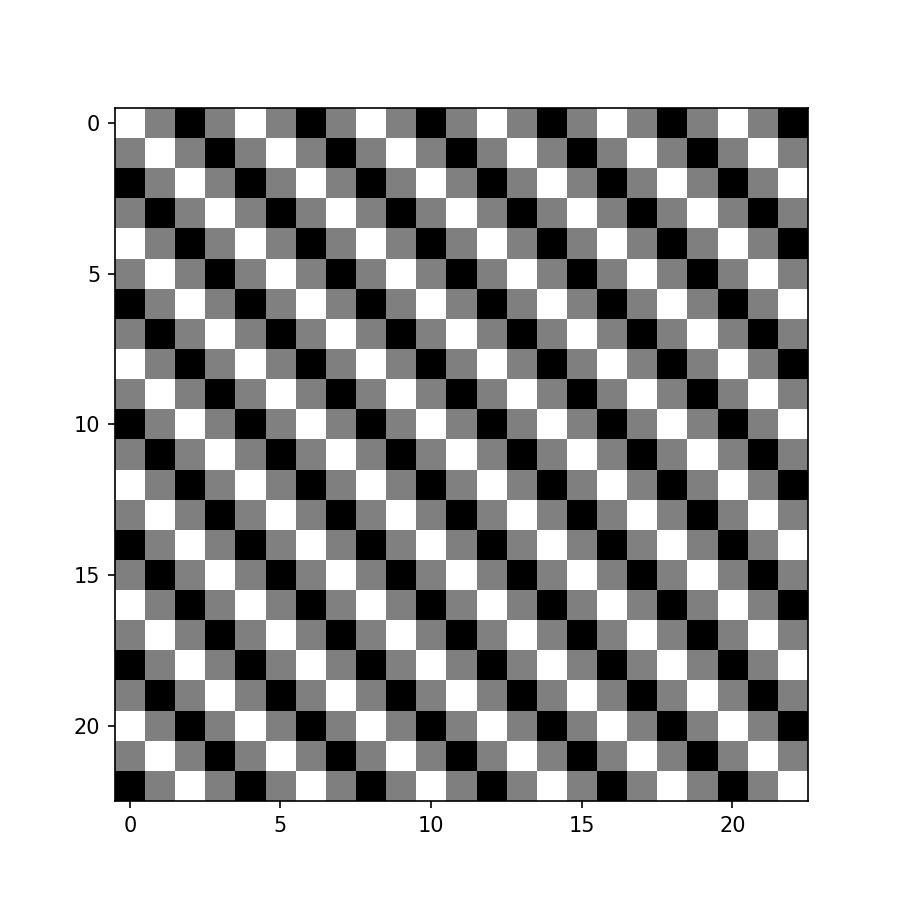

In [78]:
Ts_4 = 1/(4*fm)
s45_4 = sinusoid2d(1, 45, 512, 64, Ts_4)
imshow(s45_4)

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [69]:
def error(xr,xd,A,L):
    e = (1/(2*A*(L**2)))*np.sum(np.abs(xr-xd))
    return e

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

<IPython.core.display.Javascript object>


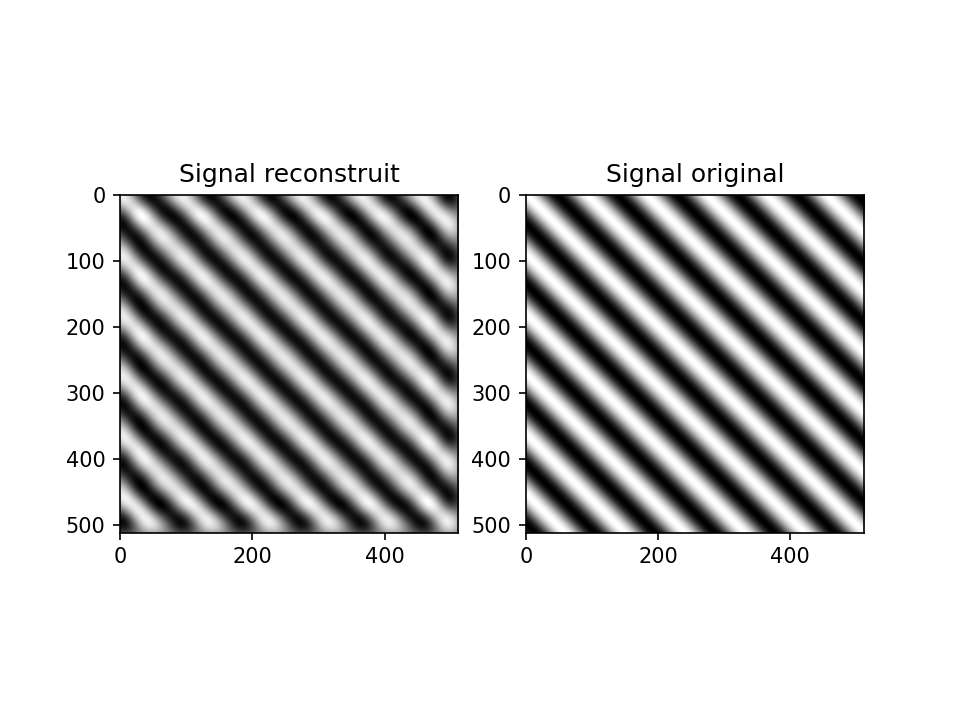

The relative average error: 0.022936924363103007


In [77]:
R1=shannonInterpolation(s45_4, Ts_4, 512)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(R1)
plt.title("Signal reconstruit")
plt.subplot(1,2,2)
plt.imshow(s45)
plt.title("Signal original")
plt.show()
print("The relative average error:",error(R1,s45,1,512))

$f_s=4 f_m$ le théorème de Shannon est vérifié donc l'erreur de reconstruction est petite. 
En théorie, si les conditions du théorème de Shannon sont satisfaites, cela garantit que le signal peut être reconstruit théoriquement sans perte d'information. En pratique, des sources d'erreur telles que la quantification et les approximations mathématiques peuvent entraîner des erreurs de reconstruction.

4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.


<IPython.core.display.Javascript object>


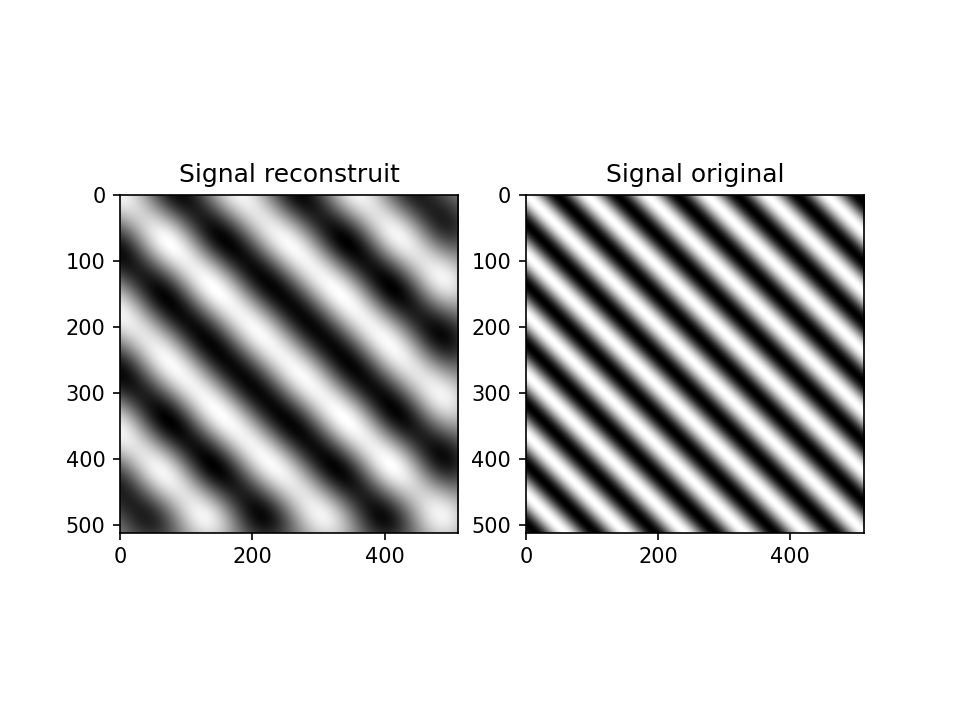

The relative average error: 0.4068626475014588


In [79]:
Ts_3_2 = 1/(1.5*fm)
s45_3_2 = sinusoid2d(1, 45, 512, 64, Ts_3_2)
R2=shannonInterpolation(s45_3_2, Ts_3_2, 512)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(R2)
plt.title("Signal reconstruit")
plt.subplot(1,2,2)
plt.imshow(s45)
plt.title("Signal original")
plt.show()
print("The relative average error:",error(R2,s45,1,512))

Le théorème de Shannon n'est pas vérifié, cela a pour conséquence le phénomène de repliement spectral (aliasing), ce qui entraine une grande erreur de reconstruction.

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

<IPython.core.display.Javascript object>


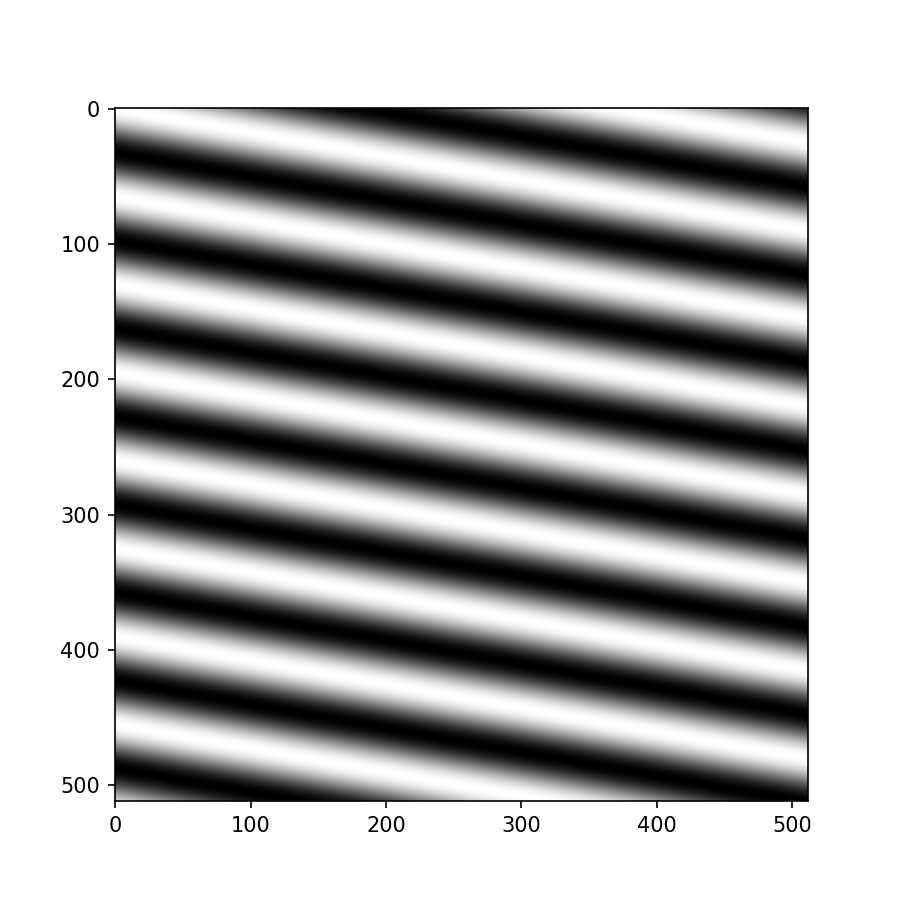

<IPython.core.display.Javascript object>


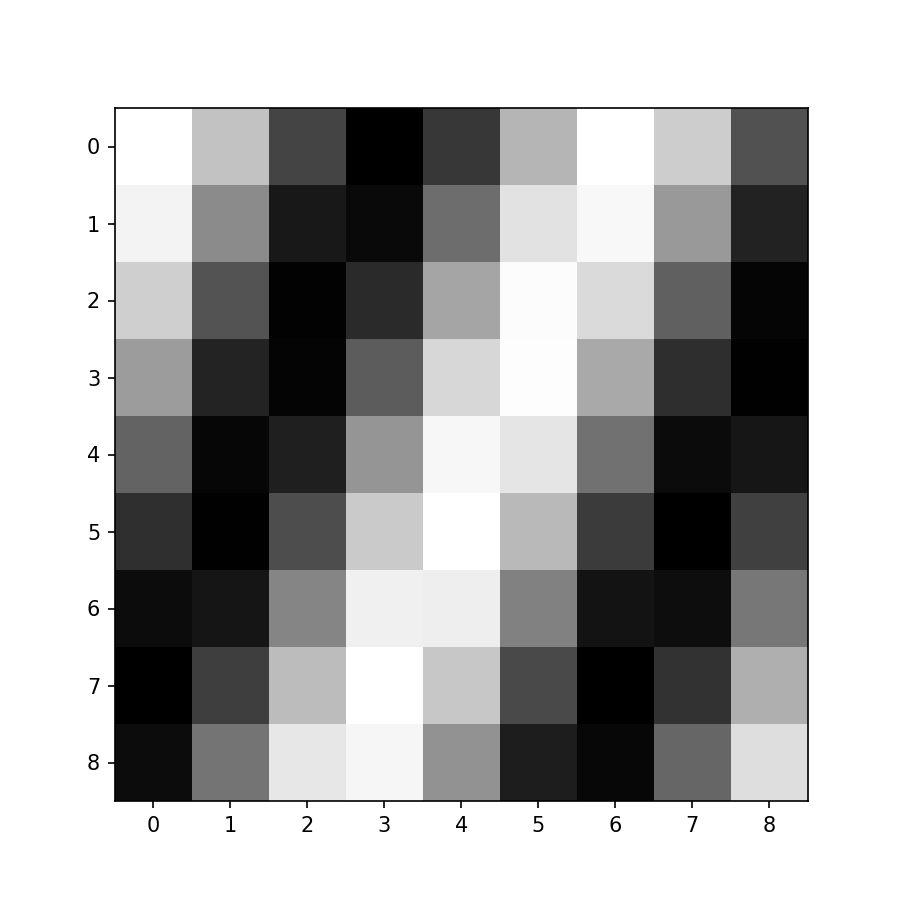

<IPython.core.display.Javascript object>


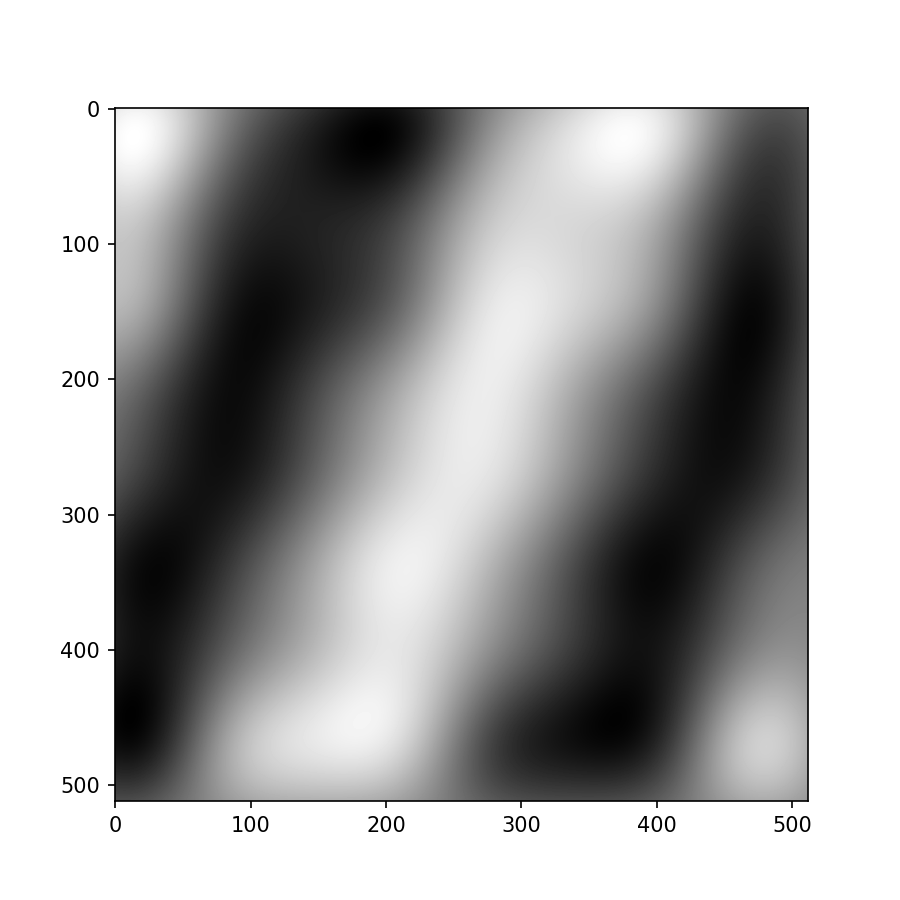

The relative average error: 0.40517392603917585


In [68]:
s10 = sinusoid2d(1, 10, 512, 64, 1)
imshow(s10)
fm_2 = (1/64)*np.cos(10/180*np.pi)
Ts_2 = 1/(1.5*fm)
s10_1_5 = sinusoid2d(1, 10, 512, 64, Ts_2)
imshow(s10_1_5)
R3=shannonInterpolation(s10_1_5, Ts_2, 512)
imshow(R3)
print("The relative average error:",error(R3,s10,1,512))

* La fréquence maximale du signal $s_{10}$ dans la direction $t$ : $f_t^{\text{max}} = f_0\cos\theta = \frac1{T_0}\cos\theta = \frac1{64}\cos10 = 0.015 Hz$

* La fréquence maximale du signal $s_{10}$ dans la direction $u$ : $f_u^{\text{max}} = f_0\sin\theta = \frac1{T_0}\sin\theta = \frac1{64}\sin10 = 0.002 Hz$

* $f_m = \max(f_t^{\text{max}},f_u^{\text{max}}) = 0.015 Hz$

Le non respect du théorème de Shannon entraine une perte de fidélité lors de la reconstruction, dans ce cas l'orientation n'est même pas préservée. Lorsque l'angle d'orientation est proche de 0 degrés ou 90 degrés (c'est-à-dire aligné avec les axes x ou y), il est plus susceptible de causer des problèmes d'aliasing et d'orientation incorrecte. C'est parce que les pixels échantillonnés et les directions d'orientation sont alignés.

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [1]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()




## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [48]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

Une sous-échantillonnage d'un facteur de 2 est le fait de réduire la taille de l'image d'un facteur de 2 à la fois dans les dimensions horizontales et verticales. En d'autres termes, cela implique de sélectionner un pixel sur deux dans chaque ligne et une ligne sur deux dans l'image.

L'impact de l'application d'un sous-échantillonnage d'un facteur de 2 sur une image :

- Réduction de la taille de l'image.

- Perte de détail.

- Aliasing. 

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

* Dans le cas d'un échantillonnage insuffisant, les composantes à haute fréquence de l'image se replient sur des composantes à basse fréquence, c'est ce qu'on appelle aliasing. Nous voyons l'apparition de nouveaux motifs et une distorsion visuelle dans les images sous-échantillonnées. L'aliasing entraine donc une perte de fidélité par rapport à l'image originale.


<IPython.core.display.Javascript object>


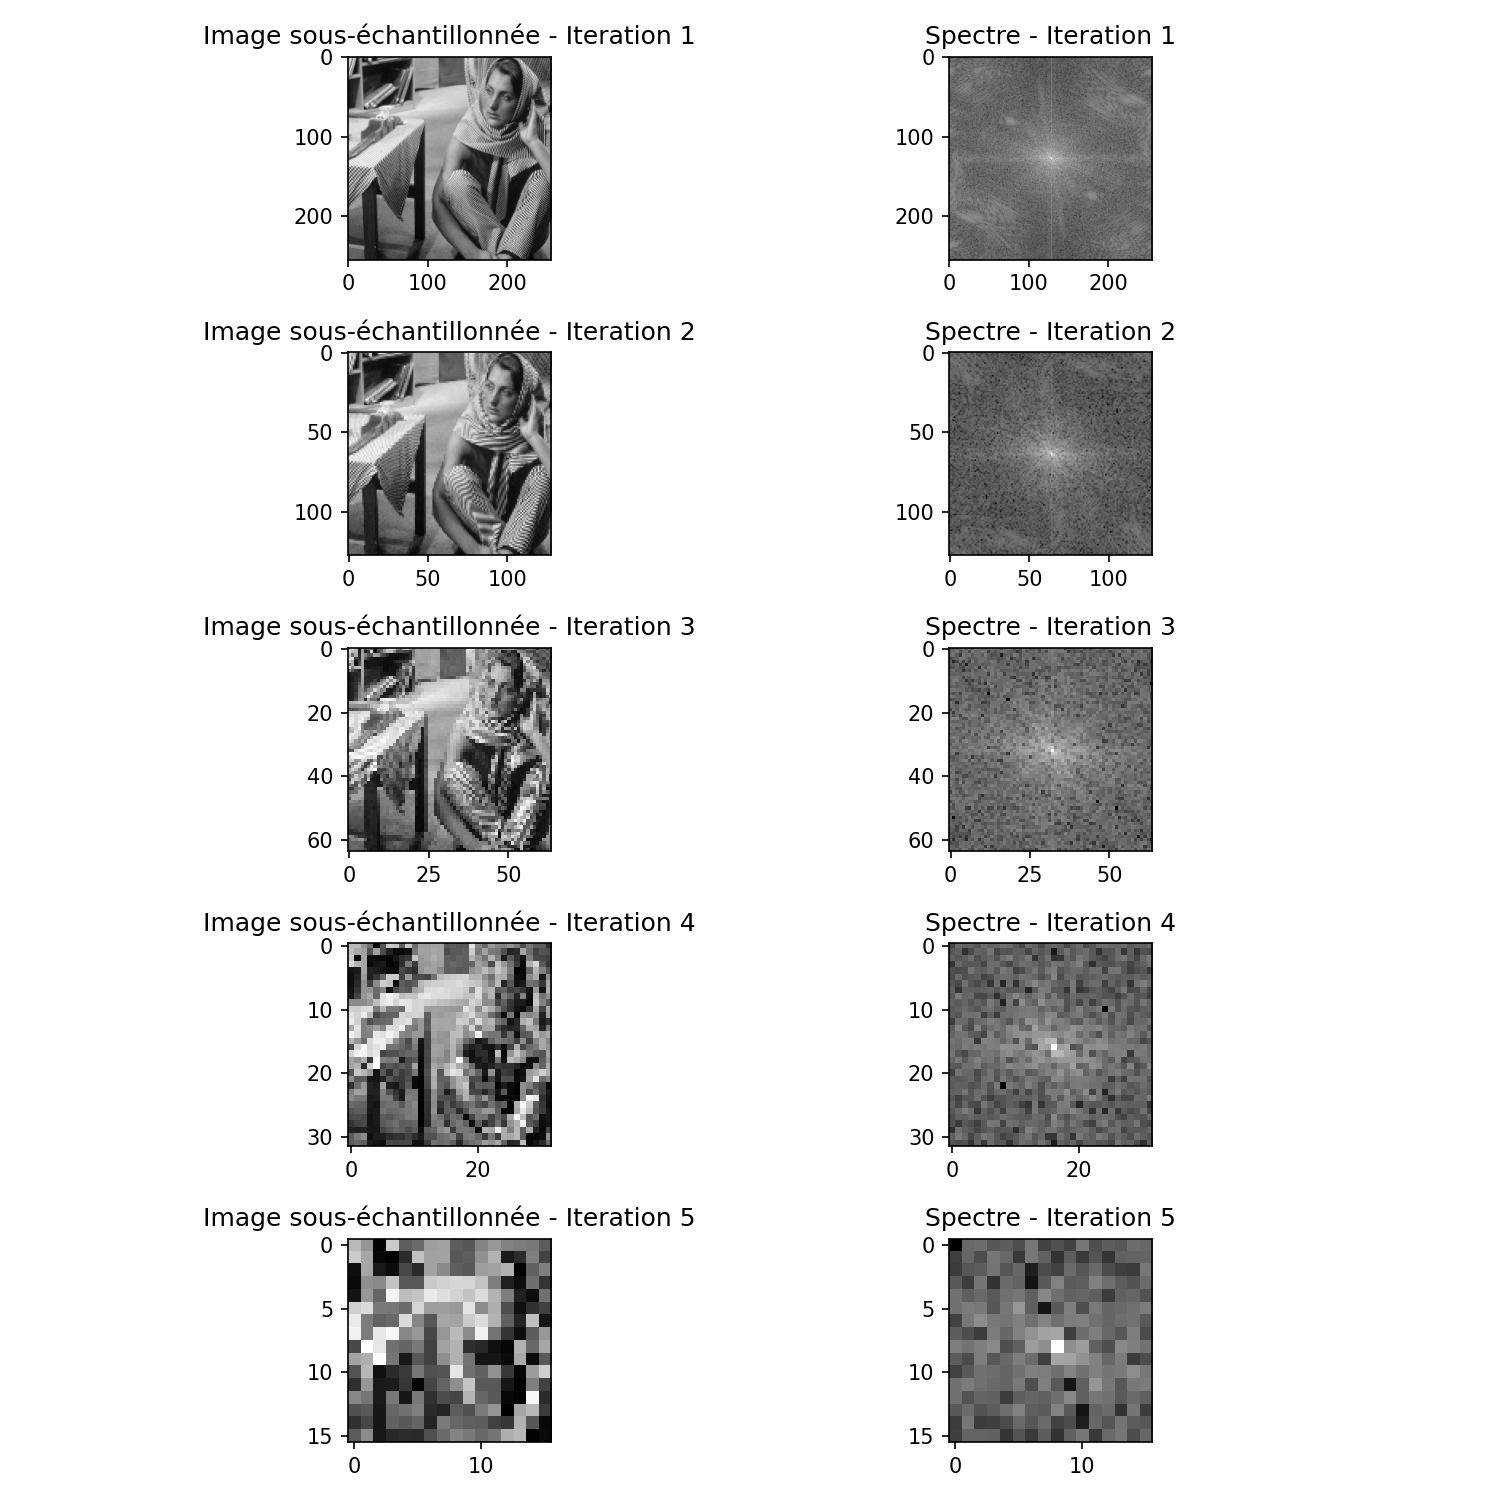

In [57]:
barbara = np.array(Image.open('img/barbara.png'))

nb_iterations = 5

plt.figure(figsize=(10, 10))

for i in range(nb_iterations):
    # Sous-échantillonnage de l'image
    subsampled_image = subSample2(barbara)
    
    # Calcul de la transformée de Fourier
    fft_subsampled = fft2(subsampled_image)
    fft_subsampled = fftshift(fft_subsampled)  
    
    # Affichage de l'image
    plt.subplot(nb_iterations, 2, 2 * i + 1)
    plt.imshow(subsampled_image, cmap='gray')
    plt.title(f'Image sous-échantillonnée - Iteration {i + 1}')
    
    # Affichage de la transformée de Fourier
    plt.subplot(nb_iterations, 2, 2 * i + 2)
    plt.imshow(np.log(np.abs(fft_subsampled)), cmap='gray')
    plt.title(f'Spectre - Iteration {i + 1}')
    
    # Update de l'image pour l'itération suivante
    barbara = subsampled_image

plt.tight_layout()
plt.show()

3. Bonus question: same question with the image `img/mandrill.png`.

<IPython.core.display.Javascript object>


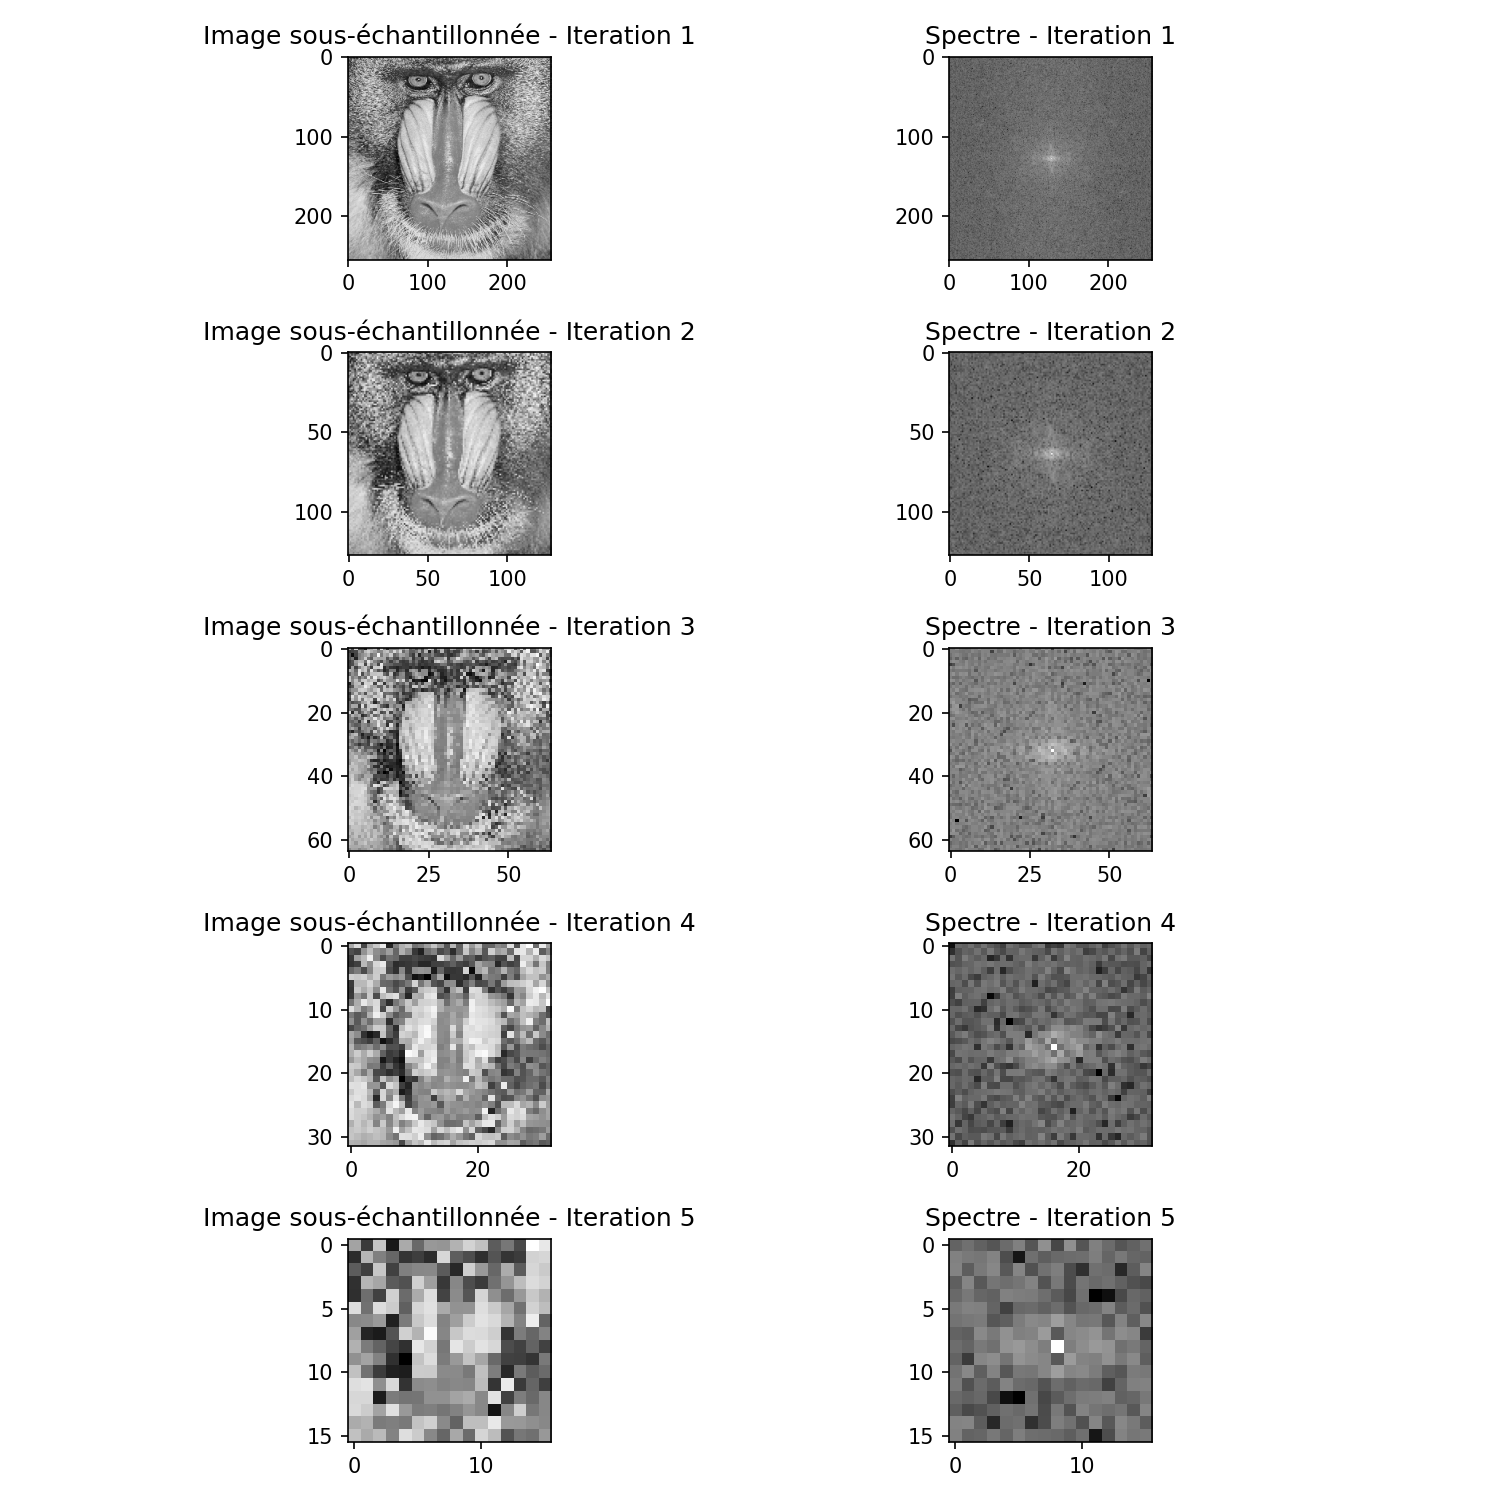

In [56]:
mandrill = np.array(Image.open('img/mandrill.png'))

nb_iterations_2 = 5

plt.figure(figsize=(10, 10))

for i in range(nb_iterations_2):
    # Sous-échantillonnage de l'image
    subsampled_image_2 = subSample2(mandrill)
    
    # Calcul de la transformée de Fourier
    fft_subsampled_2 = fft2(subsampled_image_2)
    fft_subsampled_2 = fftshift(fft_subsampled_2)  
    
    # Affichage de l'image
    plt.subplot(nb_iterations_2, 2, 2 * i + 1)
    plt.imshow(subsampled_image_2, cmap='gray')
    plt.title(f'Image sous-échantillonnée - Iteration {i + 1}')
    
    # Affichage de la transformée de Fourier
    plt.subplot(nb_iterations_2, 2, 2 * i + 2)
    plt.imshow(np.log(np.abs(fft_subsampled_2)), cmap='gray')
    plt.title(f'Spectre - Iteration {i + 1}')
    
    # Update de l'image pour l'itération suivante
    mandrill = subsampled_image_2

plt.tight_layout()
plt.show()
